## Chapter 8 - Problem 9
***

9. This problem involves the OJ data set which is part of the ISLR
package.

A. Create a training set containing a random sample of 800 observations,
and a test set containing the remaining observations.

In [8]:
require(ISLR)
require(tree)
set.seed(1430)
train <- sample(1:nrow(OJ),800)
OJ.train <- OJ[train,]
OJ.test <- OJ[-train,]

**B.** Fit a tree to the training data, with Purchase as the response
and the other variables except for Buy as predictors. Use the
summary() function to produce summary statistics about the
tree, and describe the results obtained. What is the training
error rate? How many terminal nodes does the tree have?

In [13]:
OJ.tree <- tree(Purchase~., data = OJ.train)
summary(OJ.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "SalePriceMM"   "PriceDiff"     "ListPriceDiff"
Number of terminal nodes:  7 
Residual mean deviance:  0.7502 = 594.9 / 793 
Misclassification error rate: 0.1475 = 118 / 800 

1. The training error rate is 0.1475. <br>  
2. The final tree only considers 4 variables. **LoyalCH**, **SalePriceMM**, **PriceDiff** and **ListPriceDiff**. <br>
3. The number of terminal nodes is 7. <br>

**C.** Type in the name of the tree object in order to get a detailed
text output. Pick one of the terminal nodes, and interpret the
information displayed.

In [14]:
OJ.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1060.00 CH ( 0.62375 0.37625 )  
   2) LoyalCH < 0.482304 281  306.30 MM ( 0.23488 0.76512 )  
     4) LoyalCH < 0.260429 153   98.15 MM ( 0.09804 0.90196 ) *
     5) LoyalCH > 0.260429 128  172.10 MM ( 0.39844 0.60156 )  
      10) SalePriceMM < 2.04 71   78.16 MM ( 0.23944 0.76056 ) *
      11) SalePriceMM > 2.04 57   76.88 CH ( 0.59649 0.40351 ) *
   3) LoyalCH > 0.482304 519  466.10 CH ( 0.83430 0.16570 )  
     6) LoyalCH < 0.753545 237  291.10 CH ( 0.69620 0.30380 )  
      12) PriceDiff < -0.165 32   30.88 MM ( 0.18750 0.81250 ) *
      13) PriceDiff > -0.165 205  218.30 CH ( 0.77561 0.22439 )  
        26) ListPriceDiff < 0.115 31   42.68 MM ( 0.45161 0.54839 ) *
        27) ListPriceDiff > 0.115 174  156.80 CH ( 0.83333 0.16667 ) *
     7) LoyalCH > 0.753545 282  111.40 CH ( 0.95035 0.04965 ) *

For the analysis, i have picked terminal node 4 which is denoted with the * sign. 
1. The variable used for the split is **LoyalCH**. The criteria is that the value is below 0.26. <br>
2. There are 153 data points under this terminal node. <br>
3. The deviance is 98.15. <br>
4. The prediction is that Sales = MM at this terminal node. <br>
5. Almost 90% of the data points at this node have MM as Sales while 10% have CH as Sales.

At **LoyalCH** values below 0.26 is very likely that a client will prefer MM over CH.

**D.** Create a plot of the tree, and interpret the results.

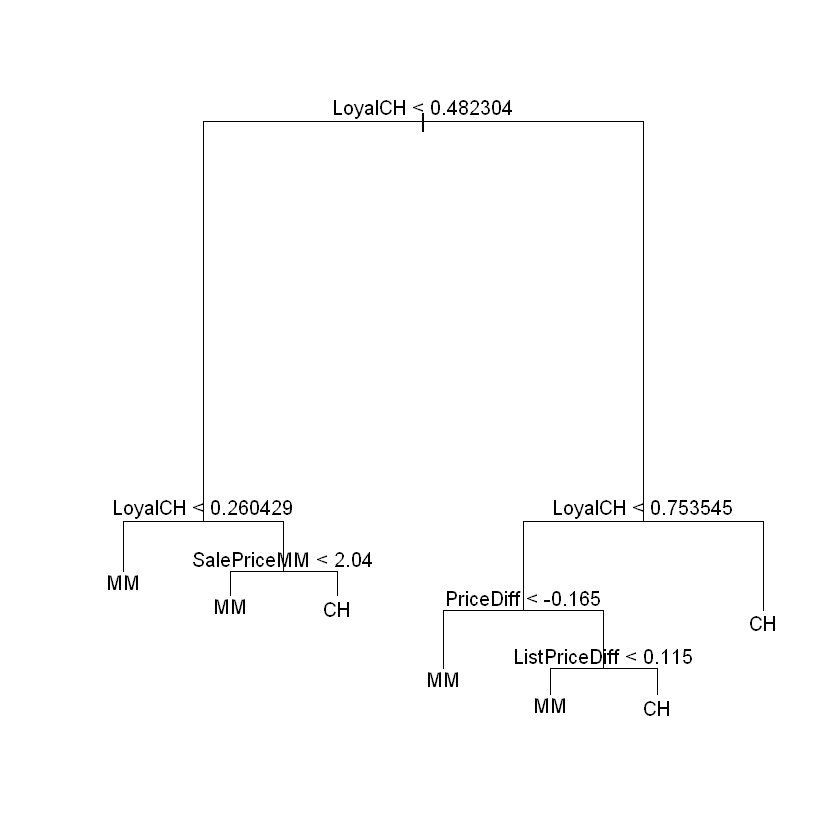

In [17]:
plot(OJ.tree); text(OJ.tree, pretty = 1)

1. The main predictor of the Sale is **LoyalCH** values. At values lower than 0.26 it is likely a client will buy MM, at values above 0.75 they are likely to buy CH.
2. At **LoyalCH** values between 0.26 and 0.48. The next predictor is the **SalPriceMM**. If the price is below 2.04, a client is more likely to buy MM. if above it is more probable that the client will buy CH.
3. At **LoyalCH** values between 0.48 and 0.75. the next predictor is the **priceDiff**. If the **priceDiff** is below -0.165. the client will likely buy MM. if not then the **ListPriceDiff** is the next variable to consider. At **ListPriceDiff** below 0.115. a client is more likely to buy MM. if not, It is more probable that the client will buy CH.




E. Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [19]:
OJ.pred <- predict(OJ.tree, newdata = OJ.test,type = "class") #type class to predict the classification not the probabilities
with(OJ.test,table(OJ.pred,Purchase))

       Purchase
OJ.pred  CH  MM
     CH 126  29
     MM  28  87

In [20]:
test.error <- (28+29)/(126+29+28+87)
test.error

[1] 0.2111111

The test error rate is 0.21

**F.** Apply the cv.tree() function to the training set in order to
determine the optimal tree size.

In [26]:
OJ.cvtree <- cv.tree(OJ.tree, FUN = prune.tree) #10 fold cross validation
OJ.cvtree

$size
[1] 7 6 5 4 3 2 1

$dev
[1]  676.9875  693.6062  701.9559  741.3316  743.7099  803.2650 1060.8665

$k
[1]      -Inf  17.08389  18.80790  36.06857  41.88607  63.63808 287.10133

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

**G.** Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.

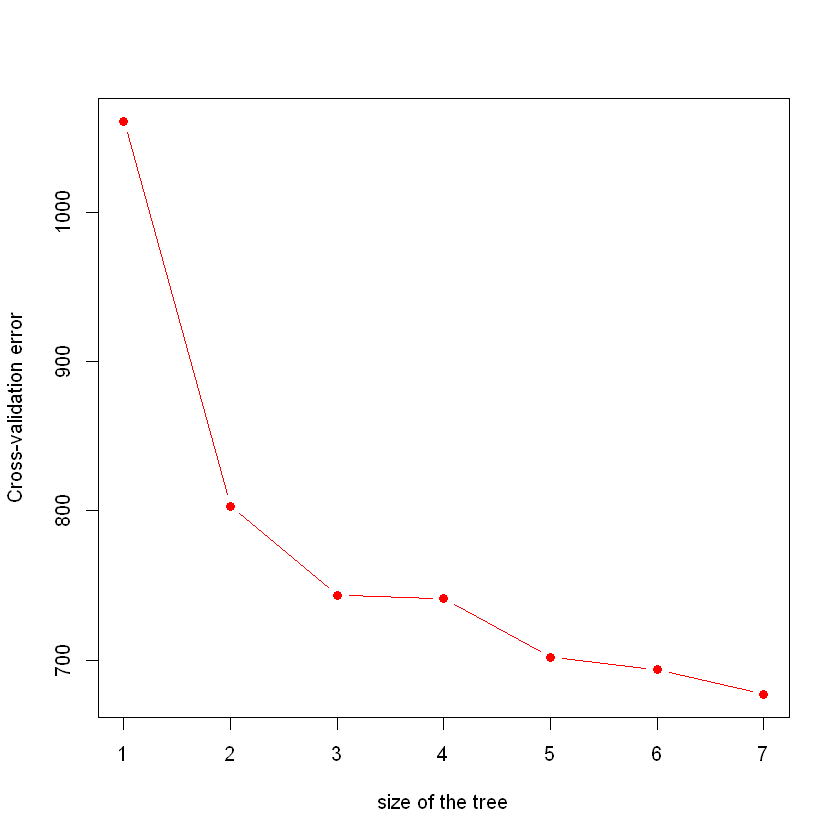

In [29]:
plot(OJ.cvtree$size,OJ.cvtree$dev, xlab = "size of the tree", ylab = "Cross-validation error", col = "red",
    type = "b", pch = 19)

**H.** Which tree size corresponds to the lowest cross-validated classification
error rate?

The lowest cross validation error (deviance) is obtained at a tree size of 7, which is the original tree size obtained from point B.

**I.** Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes.

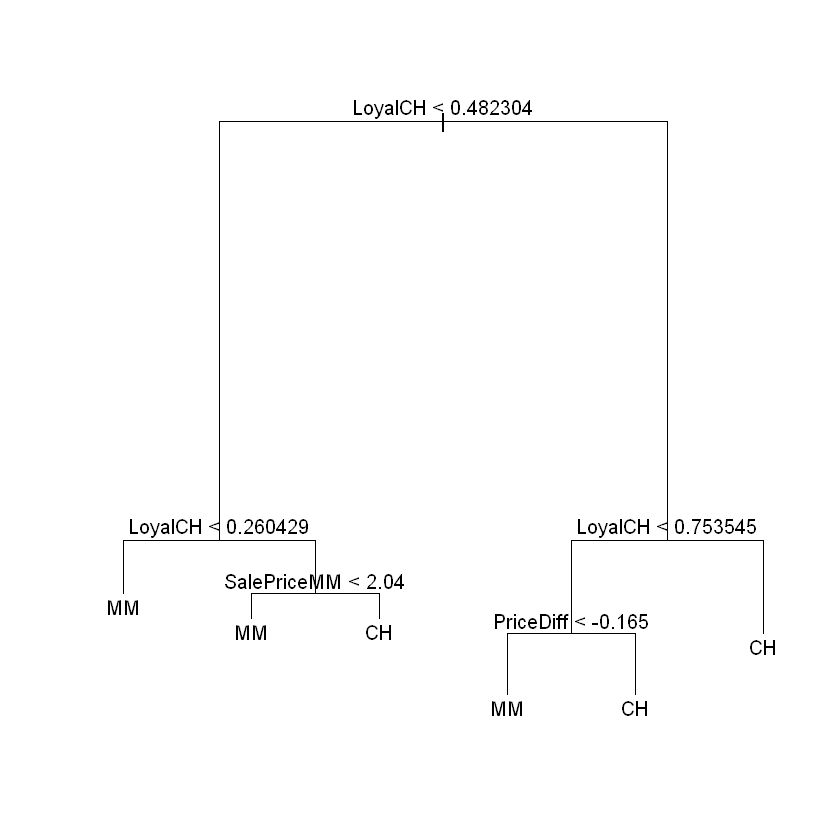

In [34]:
OJ.prunedtree = prune.misclass(OJ.tree,best = 5)
plot(OJ.prunedtree); text(OJ.prunedtree,pretty = 0)

**J.** Compare the training error rates between the pruned and unpruned
trees. Which is higher?

In [36]:
summary(OJ.prunedtree)


Classification tree:
snip.tree(tree = OJ.tree, nodes = 13L)
Variables actually used in tree construction:
[1] "LoyalCH"     "SalePriceMM" "PriceDiff"  
Number of terminal nodes:  6 
Residual mean deviance:  0.773 = 613.7 / 794 
Misclassification error rate: 0.1512 = 121 / 800 

Training error for the pruned tree is 0.1512 whereas the training error for the unpruned tree is 0.1475. The unpruned tree has a lower training error.

**K.** Compare the test error rates between the pruned and unpruned
trees. Which is higher?

In [37]:
OJ.pruned.pred <- predict(OJ.prunedtree, newdata = OJ.test,type = "class") #type class to predict the classification not the probabilities
with(OJ.test,table(OJ.pruned.pred,Purchase))

              Purchase
OJ.pruned.pred  CH  MM
            CH 131  32
            MM  23  84

In [38]:
pruned.test.error <- (23+32)/(131+32+23+84)
pruned.test.error

[1] 0.2037037

The test error for the pruned tree is 0.2037 which is slighlty lower that the test error obtained from the unpruned tree 0.21.